🔹 Original DataFrame:
       Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  30.0          NaN
3      NaN  22.0      Chicago
4      Eve   NaN        Miami

🔹 Missing Values Per Column:
 Name    1
Age     2
City    1
dtype: int64

🔹 Total Missing Values: 4


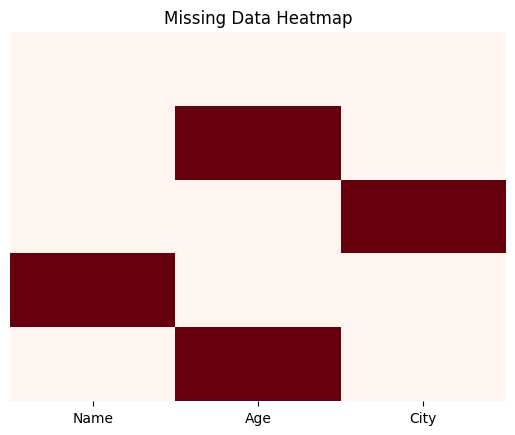


✅ DataFrame After Dropping Rows with Missing Values:
     Name   Age      City
0  Alice  25.0  New York

✅ DataFrame After Imputation:
       Name        Age         City
0    Alice  25.000000     New York
1      Bob  25.666667  Los Angeles
2  Charlie  30.000000      Chicago
3    Alice  22.000000      Chicago
4      Eve  25.666667        Miami

📊 Summary:
Original Rows: 5
After Drop Rows: 1
Missing After Imputation: 0 (should be 0)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Create Sample Data
# ----------------------------
data = {
    'Name': ['Alice', 'Bob', 'Charlie', np.nan, 'Eve'],
    'Age': [25, np.nan, 30, 22, np.nan],
    'City': ['New York', 'Los Angeles', np.nan, 'Chicago', 'Miami']
}

df = pd.DataFrame(data)
print("🔹 Original DataFrame:\n", df)

# ----------------------------
# Step 2: Detect Missing Data
# ----------------------------
print("\n🔹 Missing Values Per Column:\n", df.isnull().sum())
print("\n🔹 Total Missing Values:", df.isnull().sum().sum())

# Optional: Visualize Missing Data
sns.heatmap(df.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# ----------------------------
# Step 3: Handle by Dropping
# ----------------------------
df_dropped = df.dropna()
print("\n✅ DataFrame After Dropping Rows with Missing Values:\n", df_dropped)

# ----------------------------
# Step 4: Handle by Imputation
# ----------------------------

# Copy original to preserve it
df_imputed = df.copy()

# Fill numeric columns with mean
for col in df_imputed.select_dtypes(include='number').columns:
    mean_value = df_imputed[col].mean()
    df_imputed[col].fillna(mean_value, inplace=True)

# Fill object (categorical/text) columns with mode
for col in df_imputed.select_dtypes(include='object').columns:
    mode_value = df_imputed[col].mode()[0]
    df_imputed[col].fillna(mode_value, inplace=True)

print("\n✅ DataFrame After Imputation:\n", df_imputed)

# ----------------------------
# Summary Report
# ----------------------------
print("\n📊 Summary:")
print(f"Original Rows: {len(df)}")
print(f"After Drop Rows: {len(df_dropped)}")
print(f"Missing After Imputation: {df_imputed.isnull().sum().sum()} (should be 0)")